Author: Carlos Roberto de Melo
    
Date: 09/04/2020
    
Obj: Create a mask

In [1]:
import autofit as af
import autolens as al
import autolens.plot as aplt
import scribbler
import numpy as np

In [2]:
from pyprojroot import here

workspace_path = str(here())
print("Workspace Path: ", workspace_path)

Workspace Path:  /home/carlos/Documents/GitHub/Master-Degree


Create the path where the mask will be output,

In [3]:
dataset_type = "Autolens/Combined/Data"


dataset_path = af.util.create_path(
    path=workspace_path, folders=["SDP81", dataset_type]
)

In [4]:
dataset_path

'/home/carlos/Documents/GitHub/Master-Degree/SDP81/Autolens/Combined/Data/'

First, load the imaging dataset, so that the mask can be plotted over the strong lens image.

In [5]:
pixel_scales = 0.01

image = al.Array.from_fits(hdu=1,
    file_path=f"{dataset_path}/Alma_with_lens_center_1.fits", pixel_scales=pixel_scales,
)

In [6]:
#Select and drawn the mask
scribbler = scribbler.Scribbler(image=image.in_2d/3e-6)

In [7]:
mask = scribbler.show_mask()

In [8]:
mask = al.Mask.manual(mask=np.invert(mask), pixel_scales=pixel_scales)

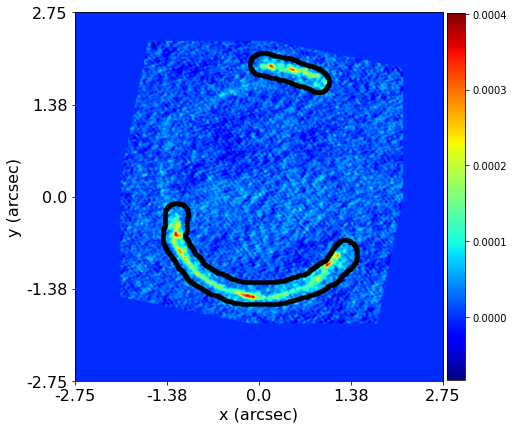

In [9]:
%matplotlib inline
aplt.Array(array=image, mask=mask)

In [10]:
#Save in fits file
mask.output_to_fits(file_path=f"{dataset_path}/mask_new1.fits", overwrite=True)

Now we load the mask and data to see how it works.

In [14]:
#Reading data
from os import path


imaging = al.Imaging.from_fits(
    image_path=path.join(dataset_path, "Alma_with_lens_center_1.fits"),
    noise_map_path=path.join(dataset_path, "rms_noise_map_1.fits"),
    psf_path=path.join(dataset_path, "Alma_psf_rot.fits"),
    pixel_scales=0.01,
    image_hdu=1, noise_map_hdu=1, psf_hdu=1,
)


In [15]:
#Load mask

mask_custom = al.Mask.from_fits(
    file_path=f"{dataset_path}/mask_new1.fits", hdu=0, pixel_scales=pixel_scales
)

masked_imaging = al.MaskedImaging(imaging=imaging, mask=mask_custom)

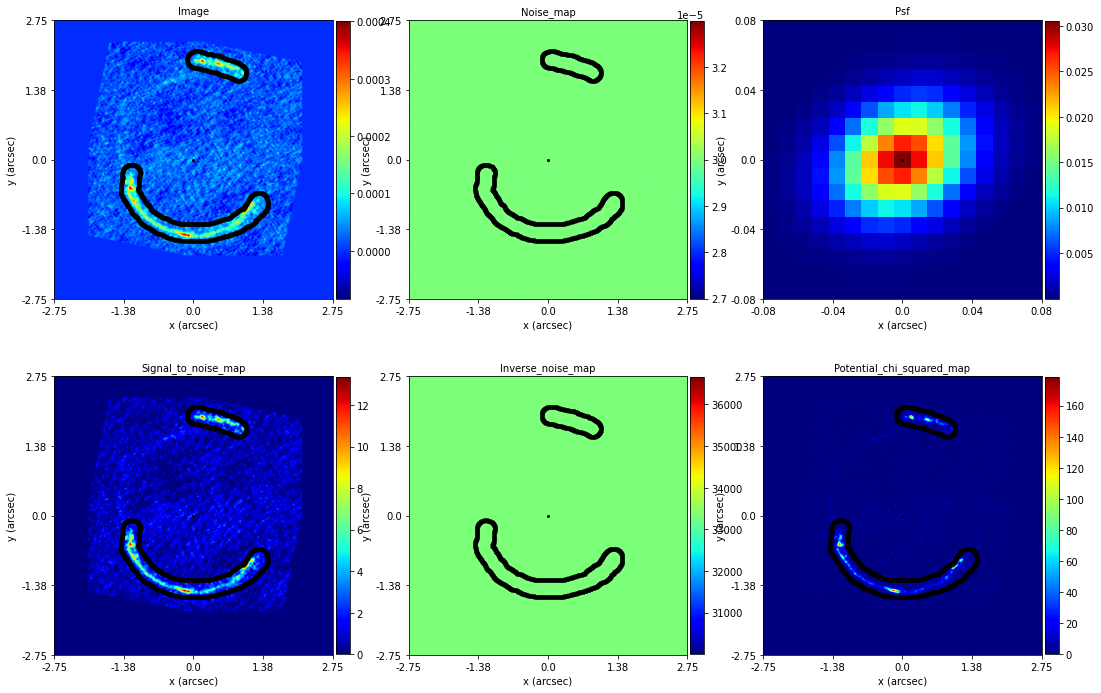

In [16]:
%matplotlib inline
#Plot
positions = al.GridCoordinates(
    coordinates=[[(0.0, 0.0)]]
)
aplt.Imaging.subplot_imaging(
    imaging=imaging, mask=mask_custom, include=aplt.Include(border=False),positions=positions,
)

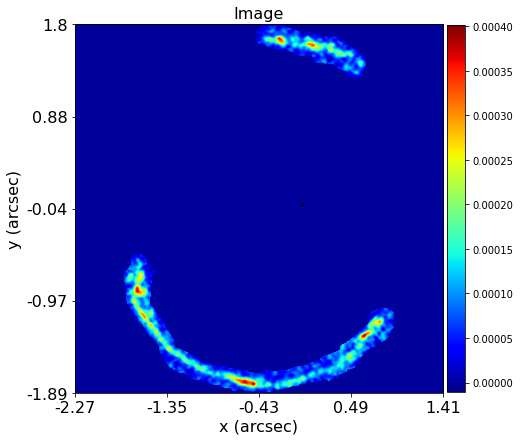

In [17]:
positions = al.GridCoordinates(
    coordinates=[[(0.0, 0.0)]]
)
aplt.Imaging.image(masked_imaging, positions=positions)

In [18]:
masked_imaging.grid.shape

(10212, 2)

In [19]:
masked_imaging.grid.shape

(10212, 2)

In [20]:
from mpdaf.obj import Image
import numpy as np

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [21]:
img   = Image("/home/carlos/Documents/GitHub/Master-Degree/SDP81/Autolens/SDP81/Data/Alma_with_lens_center.fits")
noise = Image("/home/carlos/Documents/GitHub/Master-Degree/SDP81/Autolens/SDP81/Data/rms_noise_map.fits")

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'.


In [22]:
sn_map = img/noise.data.data[0][0]

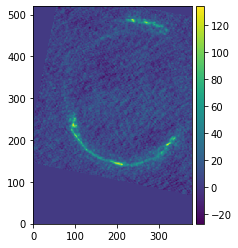

In [23]:
%matplotlib inline
sn_map.plot(colorbar='v')

In [36]:
mask = (sn_map.data.data > 20) & (sn_map.data.data < 35)

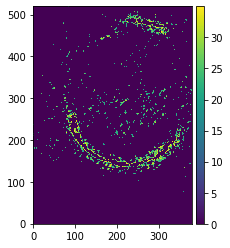

In [37]:
%matplotlib inline

new_mask = sn_map * mask
new_mask.plot(colorbar='v')

In [30]:
new_mask.data.data[np.where(new_mask.data.data != 0)] = 1

In [31]:
new_mask.write("/home/carlos/Documents/GitHub/Master-Degree/SDP81/Autolens/SDP81/Data/new_mask.fits")

# Testing new mask

In [32]:
import autofit as af
import autolens as al
import autolens.plot as aplt
import scribbler
import numpy as np

In [33]:
dataset_path = "/home/carlos/Documents/GitHub/Master-Degree/SDP81/Autolens/SDP81/Data/"
from os import path

imaging = al.Imaging.from_fits(
    image_path=path.join(dataset_path, "Alma_with_lens_center.fits"),
    noise_map_path=path.join(dataset_path, "rms_noise_map.fits"),
    psf_path=path.join(dataset_path, "Alma_psf_rot.fits"),
    pixel_scales=0.01,
    image_hdu=1, noise_map_hdu=1, psf_hdu=1,
)


In [34]:
#Load mask

mask_custom = al.Mask.from_fits(
    file_path=f"{dataset_path}/new_mask.fits", hdu=1, pixel_scales=imaging.pixel_scales
)

masked_imaging = al.MaskedImaging(imaging=imaging, mask=mask_custom)

MaskException: setup_blurring_mask extends beyond the sub_size of the mask - pad the datas array before masking

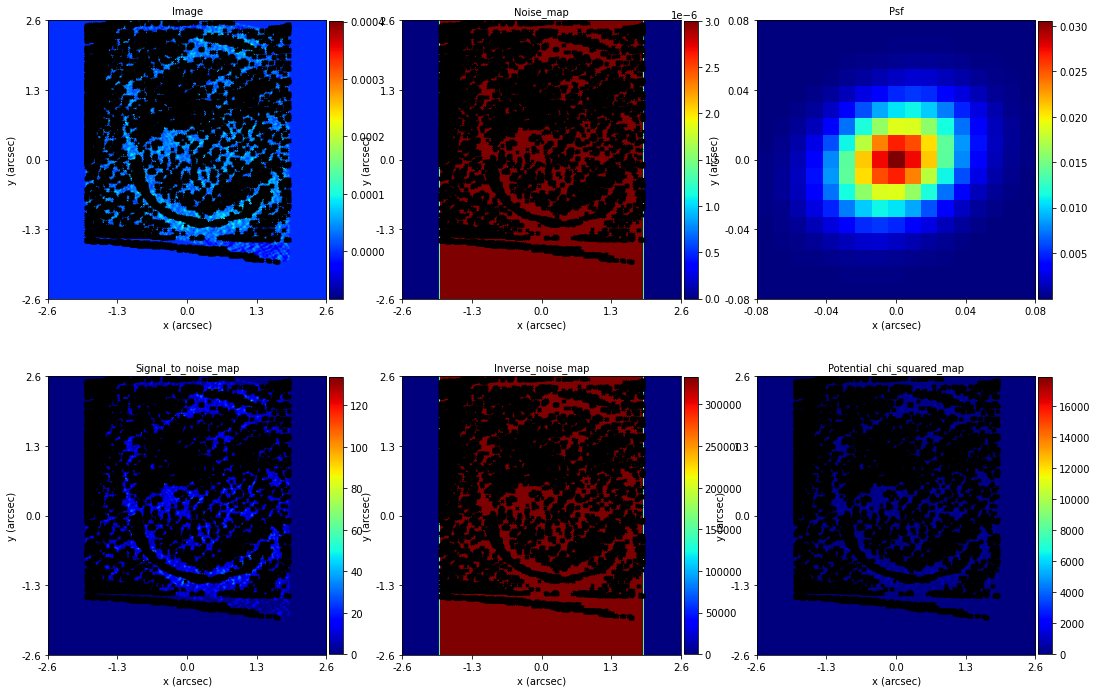

In [35]:
#Plot
%matplotlib inline

aplt.Imaging.subplot_imaging(
    imaging=imaging, mask=mask_custom, include=aplt.Include(border=False),
)

In [31]:
masked_imaging.grid.shape

(14807, 2)